# Quantum Fourier Transform

The Quantum Fourier Transform (QFT) is an important subroutine to many quantum algorithms, most famously Shor's algorithm for factoring and the quantum phase estimation (QPE) algorithm for estimating the eigenvalues of a unitary operator [1, 2]. The QFT can be performed efficiently on a quantum computer, using Hadamard gates, controlled phase shift gates and swap gates.

## Reference

[1] Wikipedia: https://en.wikipedia.org/wiki/Quantum_Fourier_transform

[2] Nielsen, Michael A., Chuang, Isaac L. (2010). Quantum Computation and Quantum Information (2nd ed.). Cambridge: Cambridge University Press.

In [1]:
from notebook_plotting import plot_bitstrings_formatted
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
from braket.circuits import Circuit
from braket.devices import LocalSimulator

from braket.experimental.algorithms.quantum_fourier_transform import (
    quantum_fourier_transform as qft_module
)

# Circuits
Let's visualize the circuits for quantum Fourier Transform and inverse quantum Fourier Transform.

In [2]:
n_qubits = 4
circuit = qft_module.quantum_fourier_transform_circuit(n_qubits)
print(circuit)

T  : |0|     1     |      2      |           3           |      4      |     5     | 6  | 7  |
                                                                                              
q0 : -H-PHASE(1.57)-PHASE(0.79)---PHASE(0.39)--------------------------------------------SWAP-
        |           |             |                                                      |    
q1 : ---C-----------|-----------H-|-----------PHASE(1.57)-PHASE(0.79)---------------SWAP-|----
                    |             |           |           |                         |    |    
q2 : ---------------C-------------|-----------C-----------|-----------H-PHASE(1.57)-SWAP-|----
                                  |                       |             |                |    
q3 : -----------------------------C-----------------------C-------------C-----------H----SWAP-

T  : |0|     1     |      2      |           3           |      4      |     5     | 6  | 7  |


In [3]:
circuit = qft_module.inverse_quantum_fourier_transform_circuit(n_qubits)
print(circuit)

T  : |    0    |1|     2      |      3       |            4            |      5       |     6      |7|
                                                                                                      
q0 : -SWAP-------------------------------------------------PHASE(-0.39)---PHASE(-0.79)-PHASE(-1.57)-H-
      |                                                    |              |            |              
q1 : -|----SWAP------------------PHASE(-0.79)-PHASE(-1.57)-|------------H-|------------C--------------
      |    |                     |            |            |              |                           
q2 : -|----SWAP---PHASE(-1.57)-H-|------------C------------|--------------C---------------------------
      |           |              |                         |                                          
q3 : -SWAP------H-C--------------C-------------------------C------------------------------------------

T  : |    0    |1|     2      |      3       |            4            |

You can use methods `qft()` and `iqft()` to append quantum Fourier Transform circuits to am existing circuit. 

In [4]:
circuit = Circuit().x(range(n_qubits))
circuit.qft(range(n_qubits))
print(circuit)

T  : |0|1|     2     |      3      |           4           |      5      |     6     | 7  | 8  |
                                                                                                
q0 : -X-H-PHASE(1.57)-PHASE(0.79)---PHASE(0.39)--------------------------------------------SWAP-
          |           |             |                                                      |    
q1 : -X---C-----------|-----------H-|-----------PHASE(1.57)-PHASE(0.79)---------------SWAP-|----
                      |             |           |           |                         |    |    
q2 : -X---------------C-------------|-----------C-----------|-----------H-PHASE(1.57)-SWAP-|----
                                    |                       |             |                |    
q3 : -X-----------------------------C-----------------------C-------------C-----------H----SWAP-

T  : |0|1|     2     |      3      |           4           |      5      |     6     | 7  | 8  |


In [5]:
circuit = Circuit().x(range(n_qubits))
circuit.iqft(range(n_qubits))
print(circuit)

T  : |0|    1    |2|     3      |      4       |            5            |      6       |     7      |8|
                                                                                                        
q0 : -X-SWAP-------------------------------------------------PHASE(-0.39)---PHASE(-0.79)-PHASE(-1.57)-H-
        |                                                    |              |            |              
q1 : -X-|----SWAP------------------PHASE(-0.79)-PHASE(-1.57)-|------------H-|------------C--------------
        |    |                     |            |            |              |                           
q2 : -X-|----SWAP---PHASE(-1.57)-H-|------------C------------|--------------C---------------------------
        |           |              |                         |                                          
q3 : -X-SWAP------H-C--------------C-------------------------C------------------------------------------

T  : |0|    1    |2|     3      |      4       |      

# Local Simulator

## Example 1 - With no state preparation

(0.0, 1.0)

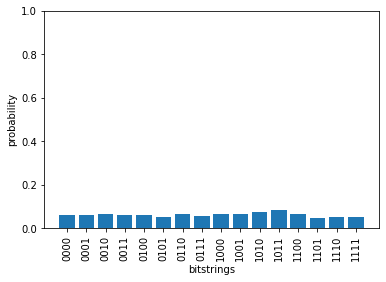

In [6]:
task = qft_module.run_quantum_fourier_transform(
    qubits=range(4), 
    n_shots=1000, 
    device=LocalSimulator()
)
probabilities = task.result().values[0]
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

## Example 2 - With state preparation

(0.0, 1.0)

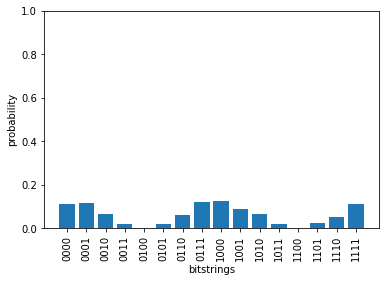

In [7]:
h_tgt = 2
state_prep_circ = Circuit().h(h_tgt)

task = qft_module.run_quantum_fourier_transform(
    qubits=range(4), 
    n_shots=1000, 
    state_prep_circ=state_prep_circ, 
    device=LocalSimulator()
)

probabilities = task.result().values[0]
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

## Example 3 - Inverse QFT

(0.0, 1.0)

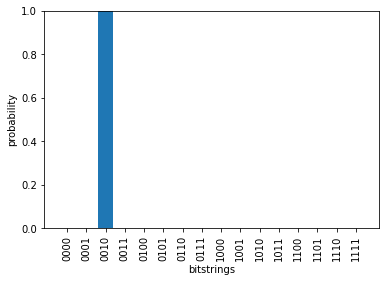

In [8]:
circ = Circuit()
circ.h(range(n_qubits))
for ii in range(n_qubits - 1):
    circ.rz(ii + 1, np.pi / (2**ii))

task = qft_module.run_quantum_fourier_transform(
    qubits=range(4),
    n_shots=1000,
    state_prep_circ=circ,
    inverse=True,  # inverse-qft
    device=LocalSimulator(),
)

probabilities = task.result().values[0]
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

# Quantum Device

In [7]:
from braket.aws import AwsDevice
from braket.tracking import Tracker

tracker = Tracker().start()

# device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")  # OQC Lucy

## Example 1 - With no state preparation

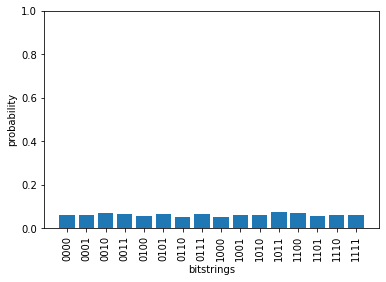

In [8]:
# task = qft_module.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     device=device
# )

# probabilities = task.result().values[0]
# plot_bitstrings_formatted(probabilities)
# plt.ylim([0, 1])

## Example 2 - With state preparation

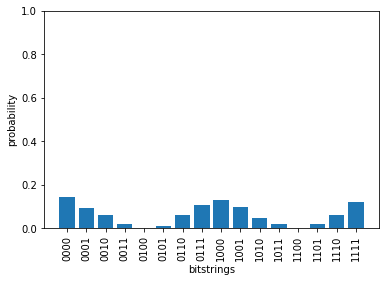

In [9]:
# h_tgt=2
# state_prep_circ = Circuit().h(h_tgt)

# task = qft_module.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     state_prep_circ=state_prep_circ,
#     device=device
# )

# probabilities = task.result().values[0]
# plot_bitstrings_formatted(probabilities)
# plt.ylim([0, 1])

## Example 3 - Inverse QFT

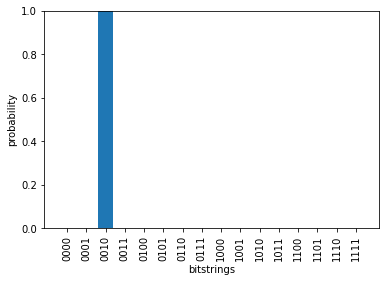

In [10]:
# circ = Circuit()
# circ.h(range(n_qubits))
# for ii in range(n_qubits - 1):
#     circ.rz(ii+1, np.pi/(2**ii))

# task = qft_module.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     state_prep_circ=circ,
#     inverse=True, # inverse-qft
#     device=device
# )

# probabilities = task.result().values[0]
# plot_bitstrings_formatted(probabilities)
# plt.ylim([0, 1])

In [11]:
print("Task Summary")
print(f"{tracker.quantum_tasks_statistics()} \n")
print(f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost():.2f} USD")

Task Summary
{'arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy': {'shots': 3000, 'tasks': {'COMPLETED': 3}}} 

Estimated cost to run this example: 1.95 USD


Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).